In [65]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

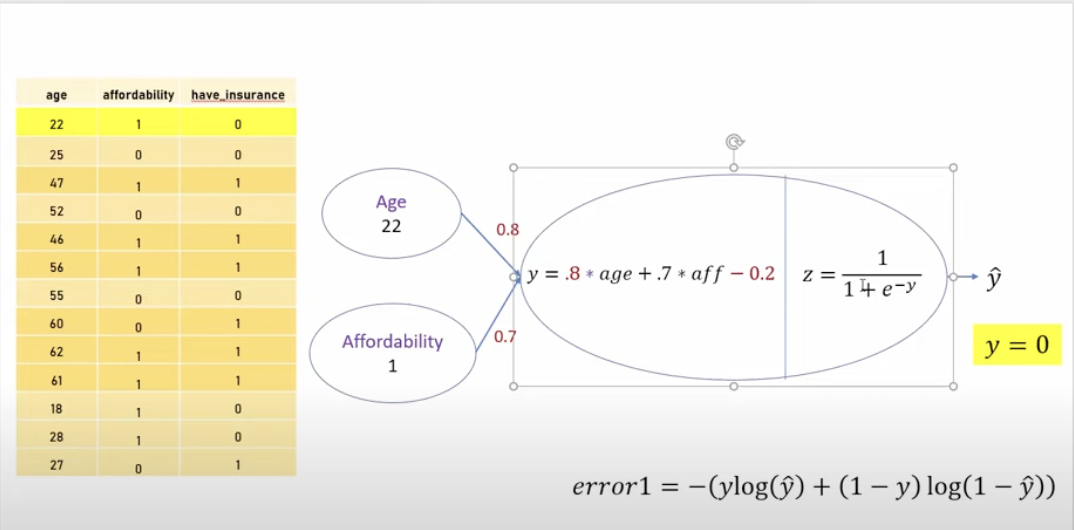

In [66]:
Image('Screenshot 2024-04-23 at 3.40.35 PM.png')

In [67]:
df = pd.read_csv(
    "/Users/athulnambiar/Desktop/PROJECTS/DL-YT/INSURANCE - GRADIENT DECENT/insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'affordibility']], df.bought_insurance, test_size=0.2, random_state=25)

In [69]:
df.shape

(28, 3)

In [70]:
len(X_train)

22

In [71]:
# TO TRAIN THE AGE AND AFFORDIBILITY ON SAME SCALE

X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [72]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid',
                       kernel_initializer='one', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000


/Users/athulnambiar/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.7079
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.7076
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - lo

In [73]:
model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 1.0000 - loss: 0.3550


[0.35497763752937317, 1.0]

In [74]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [75]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.70548475],
       [0.3556957 ],
       [0.1682783 ],
       [0.4780119 ],
       [0.72606957],
       [0.82949823]], dtype=float32)

In [76]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [77]:
coef, intercept = model.get_weights()

coef, intercept

(array([[5.060862 ],
        [1.4086522]], dtype=float32),
 array([-2.9137027], dtype=float32))

In [78]:
def sigmoid(x):
    import math
    return 1 / (1 + math.exp(-x))

In [79]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

In [80]:
def log_loss(y_true, y_predicted):
    # Set a very small value to avoid numerical instability
    epsilon = 1e-15
    # Ensure that each predicted probability is at least epsilon
    y_predicted_new = [max(i, epsilon) for i in y_predicted]
    # Ensure that each predicted probability is at most (1 - epsilon)
    y_predicted_new = [min(i, 1 - epsilon) for i in y_predicted_new]
    # Convert the list of predicted probabilities into a numpy array
    y_predicted_new = np.array(y_predicted_new)
    # Calculate the log loss using the formula for binary cross-entropy
    return -np.sum(y_true * np.log(y_predicted_new) + (1 - y_true) * np.log(1 - y_predicted_new))

In [81]:
def sigmoid_numpy(X):
    return 1/(1+np.exp(-X))

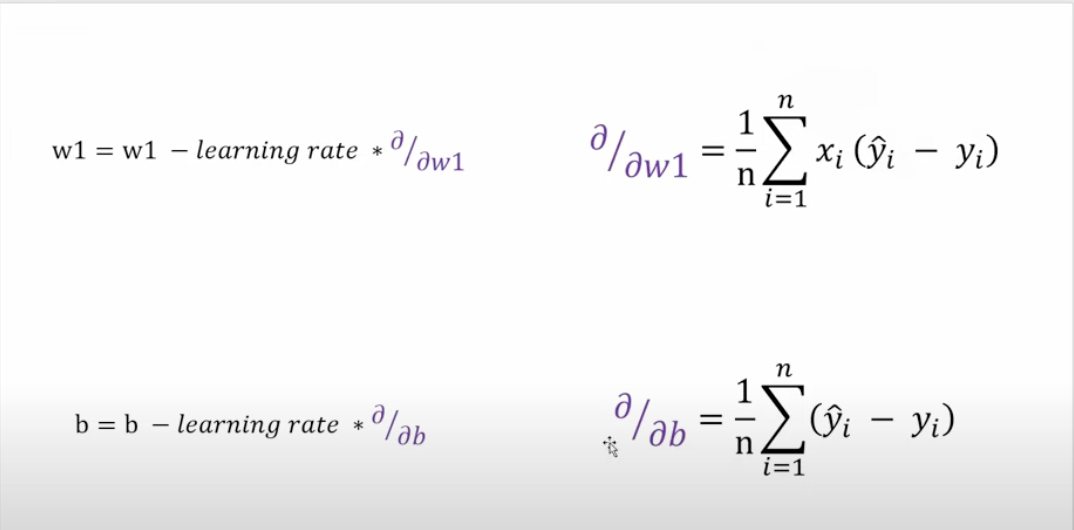

In [82]:
Image('/Users/athulnambiar/Desktop/PROJECTS/DL-YT/INSURANCE - GRADIENT DECENT/Screenshot 2024-04-23 at 3.56.22 PM.png')

In [87]:
class myNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0
    
    def fit(self,X,y,epochs,loss_threshold):
        self.w1 , self.w2, self.bias =  self.gradient_descent(X['age',X['affordibility'],y,epochs,loss_threshold])


    def predict(self,X_test):
        weighted_sum = self.w1 * x_test['age'] + self.w2 * x_test['affordibility'] + self.bias 

    def gradient_descent(self,age,affordability,y_true,epochs):
        # W1 , W2, BIAS
        w1 = w2 = 1
        bias = 0
        rate =0.5
        n =len(age)

        for i in range(epochs):
           weighted_sum =  w1*age+w2*affordability + bias
           y_predicted = sigmoid_numpy(weighted_sum)
       
           loss = log_loss(y_true,y_predicted)

           w1d= (1/n)*(np.dot(np.transpose(age),(y_predicted-y_true)))
           w2d= (1/n)*(np.dot(np.transpose(affordability),(y_predicted-y_true)))

           bias_d = np.mean(y_predicted-y_true)

           w1 = w1 - rate * w1d
           w2 = w2 - rate * w2d

           print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias},loss:{loss}') 

        return w1,w2,bias   

In [84]:
gradient_descent(X_train_scaled['age'],
                 X_train_scaled['affordability'], y_train, 1000)

KeyError: 'affordability'